# Unit Project - Part 2

In this second part, you will implement the exploratory analysis plan developed in Part 1. This will lay the groundwork for our our first modeling exercise in Part 3.

### Step 1: Load the python libraries you will need for this part 

In [1]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [4]:
#Read in data from source 
df_raw = pd.read_csv("admissions.csv")
df_raw.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [25]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400

#### Question 2. Create a summary table

In [33]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer:
* Gre scores take values between 200 and 800, while GPA varies between 0 and 4.
* So we'd expect the standard deviation of Gre to be larger than for the GPA scores given that the range of values if much greater for Gre

#### Question 4. Drop data points with missing data

In [45]:
df_cleaned = df_raw.dropna()

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

In [54]:
# This will return False if and only if 
df_cleaned.isnull().values.any()

False

#### Question 6. Create box plots for GRE and GPA

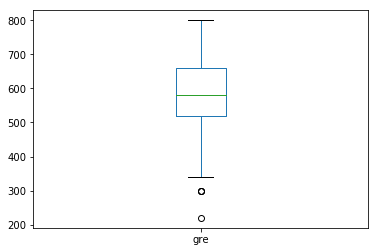

In [66]:
df_cleaned.gre.plot(kind="box")

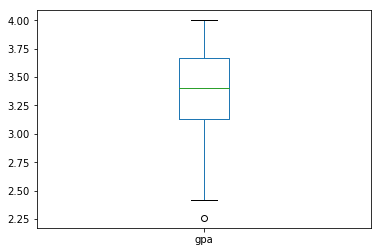

In [85]:
df_cleaned.gpa.plot(kind="box")

#### Question 7. What do this plots show?

Answer: Many things:
* The 25% and 75% quartiles, the median
* Depending on the distribution of the data, the end of the whiskers would be either the max/min or the 3rd/1st quartile +- 1.5*IQR
* The presence of outliers

In particular we can see here that we have a handful of outliers for both Gre and Gpa

#### Question 8. Describe each distribution 

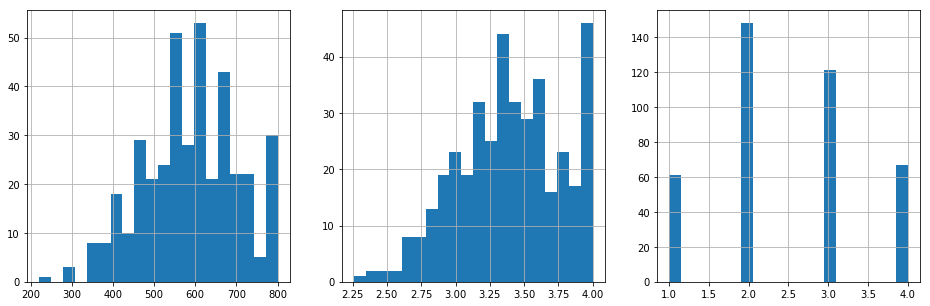

In [126]:
fig, axs = plt.subplots(1, 3)
for idx, series in enumerate(["gre", "gpa", "prestige"]):
    df_cleaned[series].hist(ax=axs[idx], bins=20, figsize=(16, 5))

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer:
Yes we would roughly meet that requirement, we can see that all distributions have a bell shape. Although they do have quite a few values concentrated around the maximum values

#### Question 10.  Does this distribution need correction? If so, why? How? 

No, the distributions are roughly normal, which higher densities for the maximum though. This could be a genuine characteristic of the overall population rather than a sampling bias.

To be on the safe side one could double check how the data was collected, was there any bias towards "good students" in terms of gre/gpa score?

Also we can notice that the distribution of the undergrad alma mater prestige isn't uniform, once again this could be a genuine characteristic of the population of students that do apply for a graduate school rather than sampling bias

#### Question 11. Which of our variables are potentially colinear? 

In [127]:
df_cleaned.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

Answer:
* Gre and Gpa are somewhat colinear which makes sense, we could argue that good students tend to be consistent across their GPA and then the Gre exam.
Although the colinearity is far from being perfect, ie there are people who perform well at the gre and without having very good gpa and the other way around.

* Also the admission rate seems to be very loosely colinear with the prestigue (negatively as the "1" means most prestigious and "4" less prestigious)

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer:  
1. Acquire the data
2. Look at the correlation between the admissions and the prestige of the undergraduate schools
3. Look at that same correlation conditioned on gre/gpa belonging to a certain interval

#### Question 14. What is your hypothesis? 

Answer: 
There is a relationship between grad school admissions rates and the prestigue of undergraduate schools. The higher the prestige the higher the more likely the student is to be admitted into the graduate schools.

The strength of this relationship could be higher/lower depending on the gre/gpa score (if we looked at the subsample where those scores belong to specific intervals)

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data
We could fill the missing values by using the mean of the distributions for example, for example if the GPA score is missing for a given observation, simply assign it the mean of the GPA for the sample.

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data